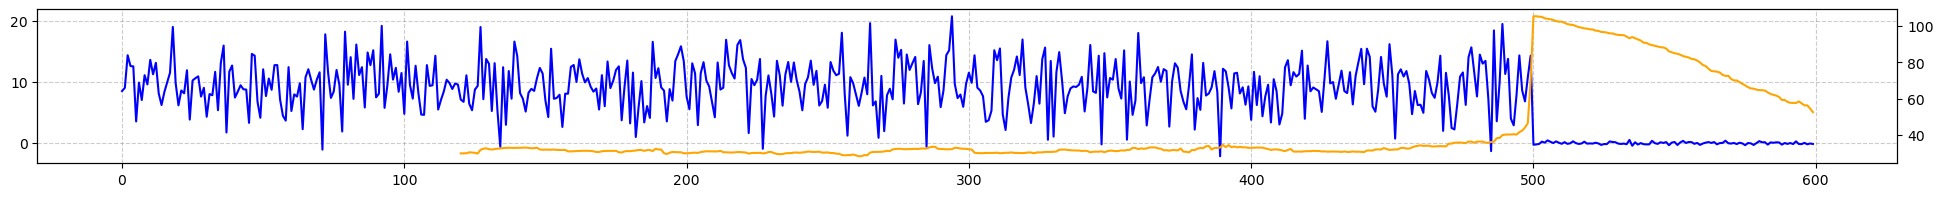

In [ ]:
arr = np.random.normal(10, 4, size = (500, )).tolist() + np.random.normal(0, 0.2, size = (100)).tolist()

# Packages
import numpy as np
from dtaidistance_master.dtaidistance.dtaidistance.subsequence import subsequence_alignment

# method setup
sub = subsequence_alignment
histories = list()
win_size = 120

# main alg
for i in range(win_size, len(arr)):
    match = sub(arr[i-win_size:i], arr[i:i+win_size//2]).best_match()
    histories += [float(match.distance)]

import matplotlib.pyplot as plt
X = np.arange(len(arr))
fig, ax = plt.subplots(1, 1, figsize = (24, 2))
ax.plot(X, arr, color = "blue")
ax.grid(color = "gray", alpha = .4, linestyle = "--")
AX = ax.twinx()
AX.plot(X[-len(histories):], histories, color = "orange")
plt.show()

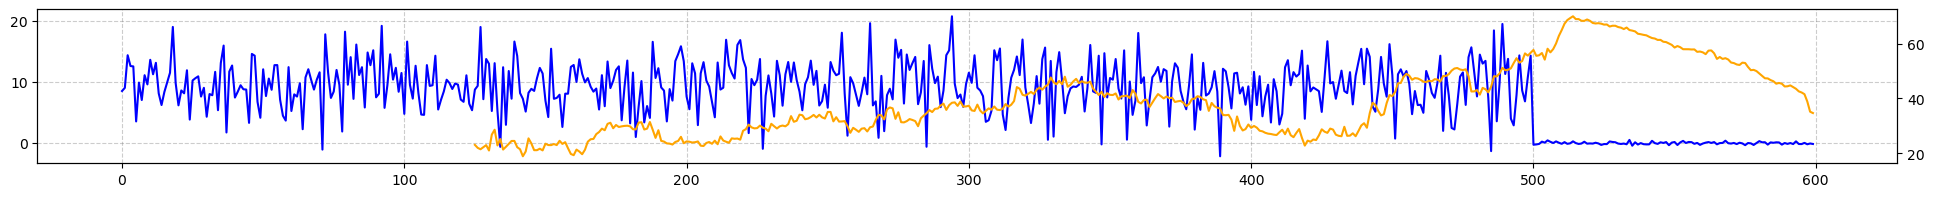

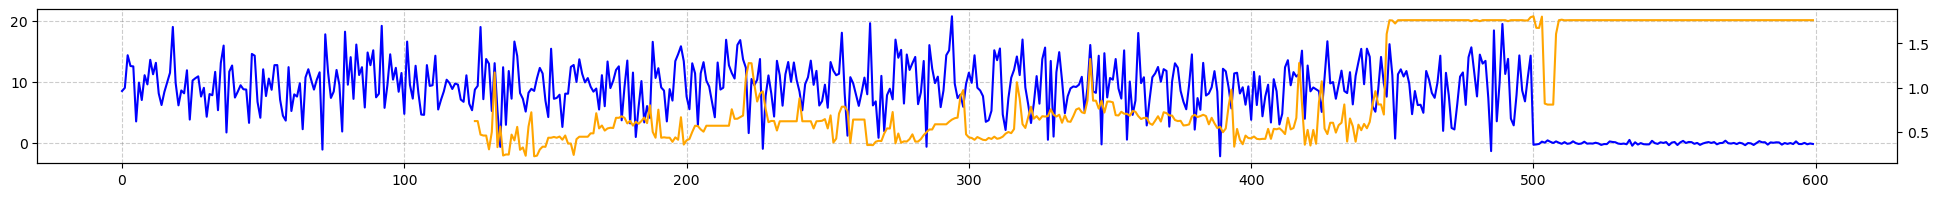

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams, wasserstein
from persim import bottleneck
from scipy.ndimage import gaussian_filter1d

# As usual, the setup, conclusive of delay embedding
histories_w = list()
histories_b = list()
def sliding_window_embedding(time_series, dim=2):
    """
    Shall notice that TDA is sensitive to noise data, so a denoising method is needed

    :param time_series: The main array data that shall be embedded into some topological space
    :param dim: The time delay for time series
    :return: A array with shape: (len(time_series), dim)
    """

    from scipy.ndimage import gaussian_filter1d

    # Add a denoising method
    time_series = gaussian_filter1d(time_series, sigma=2)
    n = len(time_series)
    return np.array([time_series[i:i+dim] for i in range(n - dim)])

for i in range(win_size, len(arr)):
    try:
        # Derive the embedding space
        embedded_1 = sliding_window_embedding(arr[i-win_size:i], dim=5)
        embedded_2 = sliding_window_embedding(arr[i:i+win_size//2], dim=5)

        # Derive the persistent homology
        diagrams_1 = ripser(embedded_1)['dgms']
        diagrams_2 = ripser(embedded_2)['dgms']

        # Compare dim1 in topology
        # histories_w += [float(wasserstein(diagrams_1[1], diagrams_2[1]))]
        # histories_b += [float(bottleneck(diagrams_1[1], diagrams_2[1]))]

        # compare dim0 in topology
        histories_w += [float(wasserstein(diagrams_1[0], diagrams_2[0]))]
        histories_b += [float(bottleneck(diagrams_1[0], diagrams_2[0]))]
    except:
        break


X = np.arange(len(arr))
fig, ax = plt.subplots(1, 1, figsize = (24, 2))
ax.plot(X, arr, color = "blue")
ax.grid(color = "gray", alpha = .4, linestyle = "--")
AX = ax.twinx()
AX.plot(X[-len(histories_w):], histories_w, color = "orange")
plt.show()

fig, ax = plt.subplots(1, 1, figsize = (24, 2))
ax.plot(X, arr, color = "blue")
ax.grid(color = "gray", alpha = .4, linestyle = "--")
AX = ax.twinx()
AX.plot(X[-len(histories_b):], histories_b, color = "orange")
plt.show()